## Importing the relevant packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()


## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("train.csv") 
df_comp=raw_csv_data.copy()
df_comp.head()
df_comp.date = pd.to_datetime(df_comp.Date, dayfirst = True)
df_comp.head()

C:\Users\sshre\AppData\Local\Temp\ipykernel_18336\3763393036.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_comp.date = pd.to_datetime(df_comp.Date, dayfirst = True)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
del df_comp['Store']
del df_comp['IsHoliday']
del df_comp['Dept']

In [4]:
data = df_comp[:143]
data.tail()
data.isna().sum()

Date            0
Weekly_Sales    0
dtype: int64

In [5]:
date_range = pd.date_range(start='2010-02-05', periods=len(data), freq='W')

data["dates"] = date_range
data.set_index("dates", inplace = True)
del data['Date']
data.head()

C:\Users\sshre\AppData\Local\Temp\ipykernel_18336\1042217197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dates"] = date_range


,Weekly_Sales
dates,
2010-02-07,24924.50
2010-02-14,46039.49
2010-02-21,41595.55
2010-02-28,19403.54
2010-03-07,21827.90


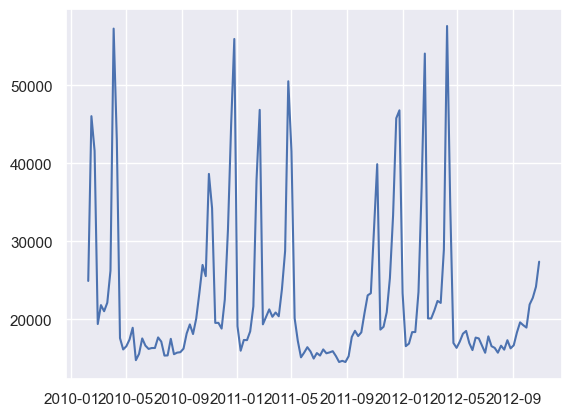

In [6]:
plt.plot(data)
plt.show()

In [7]:
data['market_value'] = data.Weekly_Sales
del data['Weekly_Sales']
data.head()

C:\Users\sshre\AppData\Local\Temp\ipykernel_18336\3943506590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['market_value'] = data.Weekly_Sales


,market_value
dates,
2010-02-07,24924.50
2010-02-14,46039.49
2010-02-21,41595.55
2010-02-28,19403.54
2010-03-07,21827.90


In [8]:
size = int(len(data)*0.8)
df, df_test = data.iloc[:size], data.iloc[size:]

## LLR Test

In [9]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## The DF-Test

In [10]:
sts.adfuller(df.market_value)

(-1.925350357960301,
 0.3202310698973555,
 6,
 107,
 {'1%': -3.492995948509562,
  '5%': -2.888954648057252,
  '10%': -2.58139291903223},
 2081.0675967041166)

## Using Returns

In [11]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]
df_test['returns'] = df_test.market_value.pct_change(1).mul(100)
df_test = df_test.iloc[1:]

C:\Users\sshre\AppData\Local\Temp\ipykernel_18336\41233031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1).mul(100)
C:\Users\sshre\AppData\Local\Temp\ipykernel_18336\41233031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['returns'] = df_test.market_value.pct_change(1).mul(100)


In [12]:
df.head()

,market_value,returns
dates,,
2010-02-14,46039.49,84.715802
2010-02-21,41595.55,-9.652453
2010-02-28,19403.54,-53.351885
2010-03-07,21827.90,12.494421
2010-03-14,21043.39,-3.594070


In [13]:
sts.adfuller(df.returns)

(-7.878403740472759,
 4.774970978370465e-12,
 5,
 107,
 {'1%': -3.492995948509562,
  '5%': -2.888954648057252,
  '10%': -2.58139291903223},
 904.9430118741601)

## ACF and PACF for Returns

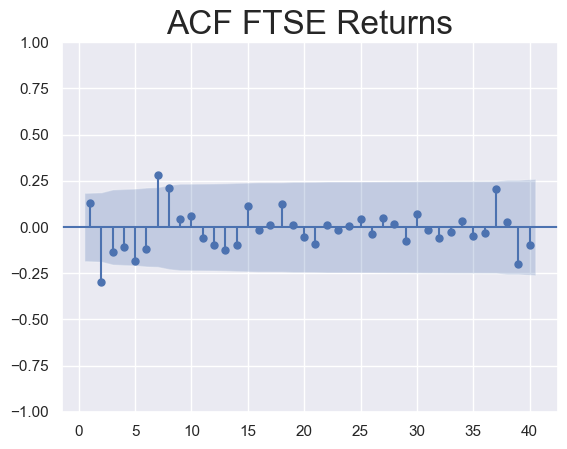

In [14]:
sgt.plot_acf(df.returns, lags=40, zero = False)
plt.title("ACF FTSE Returns", size=24)
plt.show()

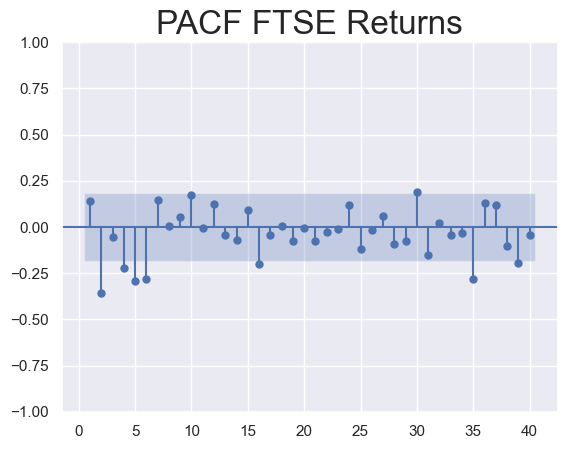

In [15]:
sgt.plot_pacf(df.returns, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF FTSE Returns", size=24)
plt.show()

## AR(1) for Returns

In [16]:
model_ret_ar_1 = ARIMA(df.returns, order = (1,0,0))

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [17]:
results_ret_ar_1 = model_ret_ar_1.fit()

In [18]:
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  113
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -539.445
Date:                Thu, 20 Jul 2023   AIC                           1084.890
Time:                        02:27:39   BIC                           1093.073
Sample:                    02-14-2010   HQIC                          1088.211
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3105      3.613      1.470      0.142      -1.770      12.391
ar.L1          0.1505      0.102      1.475      0.140      -0.049       0.350
sigma2       820.2341     70.240     11.678      0.000     682.566     957.902
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                49.23
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.49
Prob(H) (two-sided):                  0.69   Kurtosis:                         6.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher-Lag AR Models for Returns

In [19]:
model_ret_ar_2 = ARIMA(df.returns, order = (2,0,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  113
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -532.049
Date:                Thu, 20 Jul 2023   AIC                           1072.098
Time:                        02:27:40   BIC                           1083.008
Sample:                    02-14-2010   HQIC                          1076.525
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7702      2.969      1.606      0.108      -1.050      10.590
ar.L1          0.2015      0.095      2.117      0.034       0.015       0.388
ar.L2         -0.3804      0.096     -3.944      0.000      -0.570      -0.191
sigma2       717.6248     74.389      9.647      0.000     571.826     863.424
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                71.74
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             1.17
Prob(H) (two-sided):                  0.84   Kurtosis:                         6.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.0

In [21]:
model_ret_ar_3 = ARIMA(df.returns, order = (3,0,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  113
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -531.881
Date:                Thu, 20 Jul 2023   AIC                           1073.762
Time:                        02:27:40   BIC                           1087.399
Sample:                    02-14-2010   HQIC                          1079.296
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7230      2.981      1.584      0.113      -1.120      10.566
ar.L1          0.1823      0.101      1.808      0.071      -0.015       0.380
ar.L2         -0.3702      0.105     -3.538      0.000      -0.575      -0.165
ar.L3         -0.0595      0.171     -0.348      0.728      -0.394       0.275
sigma2       715.4161     79.917      8.952      0.000     558.781     872.051
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                73.54
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             1.22
Prob(H) (two-sided):                  0.84   Kurtosis:                         6.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.562

In [23]:
model_ret_ar_4 = ARIMA(df.returns, order = (4,0,0))
results_ret_ar_4 = model_ret_ar_4.fit()
print(results_ret_ar_4.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_3, model_ret_ar_4)))

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  113
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -529.246
Date:                Thu, 20 Jul 2023   AIC                           1070.493
Time:                        02:27:40   BIC                           1086.857
Sample:                    02-14-2010   HQIC                          1077.133
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5301      2.819      1.607      0.108      -0.996      10.056
ar.L1          0.1617      0.100      1.617      0.106      -0.034       0.358
ar.L2         -0.4429      0.135     -3.288      0.0

In [24]:
model_ret_ar_5 = ARIMA(df.returns, order = (5,0,0))
results_ret_ar_5 = model_ret_ar_5.fit()
print(results_ret_ar_5.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_4, model_ret_ar_5)))

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  113
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -524.505
Date:                Thu, 20 Jul 2023   AIC                           1063.009
Time:                        02:27:40   BIC                           1082.101
Sample:                    02-14-2010   HQIC                          1070.756
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3663      1.832      2.384      0.017       0.777       7.956
ar.L1          0.0953      0.098      0.972      0.331      -0.097       0.287
ar.L2         -0.4604      0.131     -3.504      0.0

In [25]:
model_ret_ar_6 = ARIMA(df.returns, order = (6,0,0))
results_ret_ar_6 = model_ret_ar_6.fit()
print(results_ret_ar_6.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_5, model_ret_ar_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  113
Model:                 ARIMA(6, 0, 0)   Log Likelihood                -520.299
Date:                Thu, 20 Jul 2023   AIC                           1056.598
Time:                        02:27:41   BIC                           1078.417
Sample:                    02-14-2010   HQIC                          1065.452
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2308      1.377      3.072      0.002       1.532       6.930
ar.L1          0.0006      0.097      0.006      0.995      -0.189       0.190
ar.L2         -0.5114      0.139     -3.683      0.0

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


LLR test: 0.004


In [26]:
model_ret_ar_7 = ARIMA(df.returns, order = (7,0,0))
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  113
Model:                 ARIMA(7, 0, 0)   Log Likelihood                -519.144
Date:                Thu, 20 Jul 2023   AIC                           1056.288
Time:                        02:27:41   BIC                           1080.834
Sample:                    02-14-2010   HQIC                          1066.248
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2731      1.614      2.648      0.008       1.110       7.436
ar.L1          0.0352      0.101      0.347      0.729      -0.163       0.234
ar.L2         -0.4664      0.132     -3.535      0.000      -0.725      -0.208
ar.L3         -0.1577      0.159     -0.995      0.320      -0.468       0.153
ar.L4         -0.2792      0.140     -1.989      0.047      -0.554      -0.004
ar.L5         -0.2157      0.142     -1.520      0.129      -0.494       0.062
ar.L6         -0.2933      0.097     -3.013      0.003      -0.484      -0.103
ar.L7          0.1566      0.098      1.596      0.110      -0.036       0.349
sigma2       563.6872     59.980      9.398      0.000     446.129     681.245
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                34.71
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             0.85
Prob(H) (two-sided):                  0.28   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
print (LLR_test(model_ret_ar_6, model_ret_ar_7))

0.129


In [28]:
pred = results_ret_ar_6.predict(start=len(df), end = len(data) , dynamic = False)

<function matplotlib.pyplot.show(close=None, block=None)>

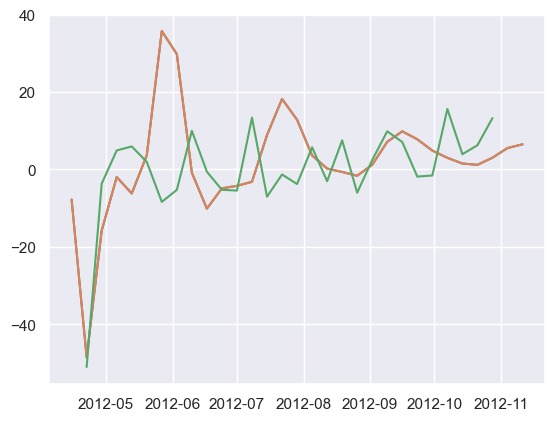

<Figure size 4000x500 with 0 Axes>

In [40]:
plt.plot(pred)
plt.plot(pred)
plt.plot(df_test.returns)
plt.figure(figsize=(40,5))
plt.show

## Normalizing Values

In [30]:
benchmark = df.market_value.iloc[0]

In [31]:
df['norm'] = df.market_value.div(benchmark).mul(100)

In [32]:
sts.adfuller(df.norm)

(-1.952571611736718,
 0.30774785270606325,
 6,
 106,
 {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717},
 847.2226399873925)

In [33]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

(-7.8784037404727565,
 4.7749709783705166e-12,
 5,
 107,
 {'1%': -3.492995948509562,
  '5%': -2.888954648057252,
  '10%': -2.58139291903223},
 937.7848839282708)

## Normalized Returns

In [34]:
model_norm_ret_ar_1 = ARIMA (df.norm_ret, order=(1,0,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                  113
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -558.188
Date:                Thu, 20 Jul 2023   AIC                           1122.377
Time:                        02:27:42   BIC                           1130.559
Sample:                    02-14-2010   HQIC                          1125.697
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2672      4.264      1.470      0.142      -2.091      14.625
ar.L1          0.1505      0.102      1.475      0.140      -0.049       0.350
sigma2      1142.9182     97.874     11.677      0.000     951.088    1334.749
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                49.23
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.49
Prob(H) (two-sided):                  0.69   Kurtosis:                         6.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
model_norm_ret_ar_2 = ARMA(df.norm_ret, order=(2,0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

NameError: name 'ARMA' is not defined

In [ ]:
model_norm_ret_ar_7 = ARIMA(df.norm_ret, order=(7,0))
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

## Analysing the Residuals

In [ ]:
df['res_ret'] = results_ret_ar_6.resid

In [ ]:
df.res_ret.mean()

In [ ]:
df.res_ret.var()

In [ ]:
sts.adfuller(df.res_ret)

In [ ]:
sgt.plot_acf(df.res_ret, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

In [ ]:
df.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()